<a href="https://colab.research.google.com/github/zhafar3adib/FSDA-RevoU/blob/main/2.%20Python/advanced_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparation and Import Dataset

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
pd.reset_option('^display.', silent=True)

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1sMeyul1arkT_FFGe-dyRAu_P8AIS8CIXNIGfE9hQRl0/edit#gid=463092305'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
balance = pd.read_csv(sheet_url_trf)
balance.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN


In [ ]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            266863 non-null  float64
 3   Saham_invested_amount                266863 non-null  float64
 4   Saham_transaction_amount             257119 non-null  float64
 5   Pasar_Uang_AUM                       331442 non-null  float64
 6   Pasar_Uang_invested_amount           331442 non-null  float64
 7   Pasar_Uang_transaction_amount        319287 non-null  float64
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  254347 non-null  float64
 11  Campuran_AUM 

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1DpVEdAvOCWnQluVaKmTMP2x7Qp6TA2uZEUzBnJF46Rs/edit#gid=1368273585'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
users = pd.read_csv(sheet_url_trf)
users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/edit#gid=1254201307'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
bond = pd.read_csv(sheet_url_trf)
bond.head()

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92


In [ ]:
bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   user_id             8484 non-null   int64
 1   flag_order_bond     8484 non-null   int64
 2   bond_units_ordered  8484 non-null   int64
dtypes: int64(3)
memory usage: 199.0 KB


#Cleaning

##Balance dataset
Change datatype and check duplicate values

In [ ]:
balance['date'] = pd.to_datetime(balance['date'])
balance.fillna(0, inplace=True)
balance.iloc[:,2:] = balance.iloc[:,2:].astype(int)

In [ ]:
balance[balance.duplicated()]

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount


##Users dataset
Change datatype, check duplicate values and typos

In [ ]:
users['registration_import_datetime'] = pd.to_datetime(users['registration_import_datetime'])
users['referral_code_used'] = users['referral_code_used'].fillna('no')

In [ ]:
users[users.duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source


In [ ]:
users['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
users['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
users['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
users['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

##Bond dataset
checking duplicated values

In [ ]:
bond[bond.duplicated()]

,user_id,flag_order_bond,bond_units_ordered


#Transform
- Count number of vintage since registration date
- Merge users dataset with bond dataset

In [ ]:
users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no,Gaji


In [ ]:
users['vintage_sep'] = pd.to_datetime('2021-09-30').normalize() - users['registration_import_datetime']
users['vintage_sep'] = users['vintage_sep']/np.timedelta64(1, 'M')
users['vintage_sep'] = users['vintage_sep'].astype(int)

users['vintage_okt'] = pd.to_datetime('2021-10-29').normalize() - users['registration_import_datetime']
users['vintage_okt'] = users['vintage_okt']/np.timedelta64(1, 'M')
users['vintage_okt'] = users['vintage_okt'].astype(int)

users_combine = users.copy()
users_combine = users_combine.merge(bond, how='left', on='user_id')
users_combine

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_sep,vintage_okt,flag_order_bond,bond_units_ordered
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no,Gaji,0,1,NaN,NaN
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no,Gaji,0,0,NaN,NaN
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no,Gaji,0,0,NaN,NaN
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no,Gaji,1,2,0.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no,Gaji,0,0,NaN,NaN
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no,Lainnya,0,0,NaN,NaN
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no,Dari Suami / istri,0,0,NaN,NaN
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no,Gaji,0,0,NaN,NaN


In [ ]:
users_combine['flag_order_bond'].value_counts()

0.0    5015
1.0    3469
Name: flag_order_bond, dtype: int64

Separate balance dataset into 2 different dataset (September and October) and create profit/loss column

In [ ]:
balance

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066,280000,0,50008,50000,0,170072,170000,0,0,0,0
1,43195,2021-10-07,285377,280000,0,50012,50000,0,170200,170000,0,0,0,0
2,43195,2021-10-08,288188,280000,0,50016,50000,0,169983,170000,0,0,0,0
3,43195,2021-10-11,285988,280000,0,50028,50000,0,169866,170000,0,0,0,0
4,43195,2021-10-12,285988,280000,0,50032,50000,0,169857,170000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0,0,0,10001,10000,0,0,0,0,0,0,0
401235,4457532,2021-10-29,0,0,0,10001,10000,0,0,0,0,0,0,0
401236,4457596,2021-10-29,0,0,0,10001,10000,0,0,0,0,0,0,0
401237,4457622,2021-10-29,0,0,0,10001,10000,0,0,0,0,0,0,0


In [ ]:
transaction_amount = [col for col in balance.columns if 'transaction_amount' in col]
aum = [col for col in balance.columns if 'AUM' in col]
invested_amount = [col for col in balance.columns if 'invested_amount' in col]

In [ ]:
balance_transformed = balance.drop(balance[transaction_amount], axis=1)
balance_transformed = balance_transformed[(balance_transformed['date'] == '2021-09-30')|
                                          (balance_transformed['date'] == '2021-10-29')]
balance_transformed['profit/loss'] = (balance_transformed[
    aum].sum(axis=1) - balance_transformed[invested_amount].sum(axis=1))/balance_transformed[
        invested_amount].sum(axis=1)
balance_transformed_sep = balance_transformed[(balance_transformed['date'] == '2021-09-30')]
balance_transformed_okt = balance_transformed[(balance_transformed['date'] == '2021-10-29')]

#Regression
Create Regression Model with September dataset and apply the model to October dataset

In [ ]:
sep = users_combine.merge(balance_transformed_sep, how='left', on='user_id')

sep_reg = sep.drop(['user_id','vintage_okt','registration_import_datetime','date'],axis=1)
sep_reg = pd.get_dummies(
    sep_reg, columns=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source','flag_order_bond'],
    prefix=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source','flag_order_bond'])

sep_reg.rename(columns={'vintage_sep': 'vintage'}, inplace=True)
sep_reg['profit/loss'].replace([np.inf, -np.inf], np.nan, inplace=True)
sep_reg = sep_reg.fillna(0).astype(int)

In [ ]:
print(sep_reg.describe().to_string())

           user_age       vintage  bond_units_ordered     Saham_AUM  Saham_invested_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  Campuran_AUM  Campuran_invested_amount  profit/loss  user_gender_Female  user_gender_Male  user_occupation_Guru  user_occupation_IRT  user_occupation_Others  user_occupation_PNS  user_occupation_Pelajar  user_occupation_Pengusaha  user_occupation_Pensiunan  user_occupation_Swasta  user_occupation_TNI/Polisi  referral_code_used_no  referral_code_used_used referral  user_income_range_< 10 Juta  user_income_range_> Rp 1 Miliar  user_income_range_> Rp 100 Juta - 500 Juta  user_income_range_> Rp 50 Juta - 100 Juta  user_income_range_> Rp 500 Juta - 1 Miliar  user_income_range_Rp 10 Juta - 50 Juta  user_income_source_Bunga Simpanan  user_income_source_Dari Orang Tua / Anak  user_income_source_Dari Suami / istri  user_income_source_Gaji  user_income_source_Hasil Investasi  user_income_source_Keuntungan B

##Create Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [ ]:
corr_column = sep_reg.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['bond_units_ordered']))
corr_column

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_occupation_Swasta',
 'user_income_source_Hasil Investasi',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Campuran_AUM',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'Pasar_Uang_invested_amount',
 'user_income_source_Dari Suami / istri',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'flag_order_bond_0.0',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'Pendapatan_Tetap_invested_amount',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'Saham_invested_amount',
 'user_i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


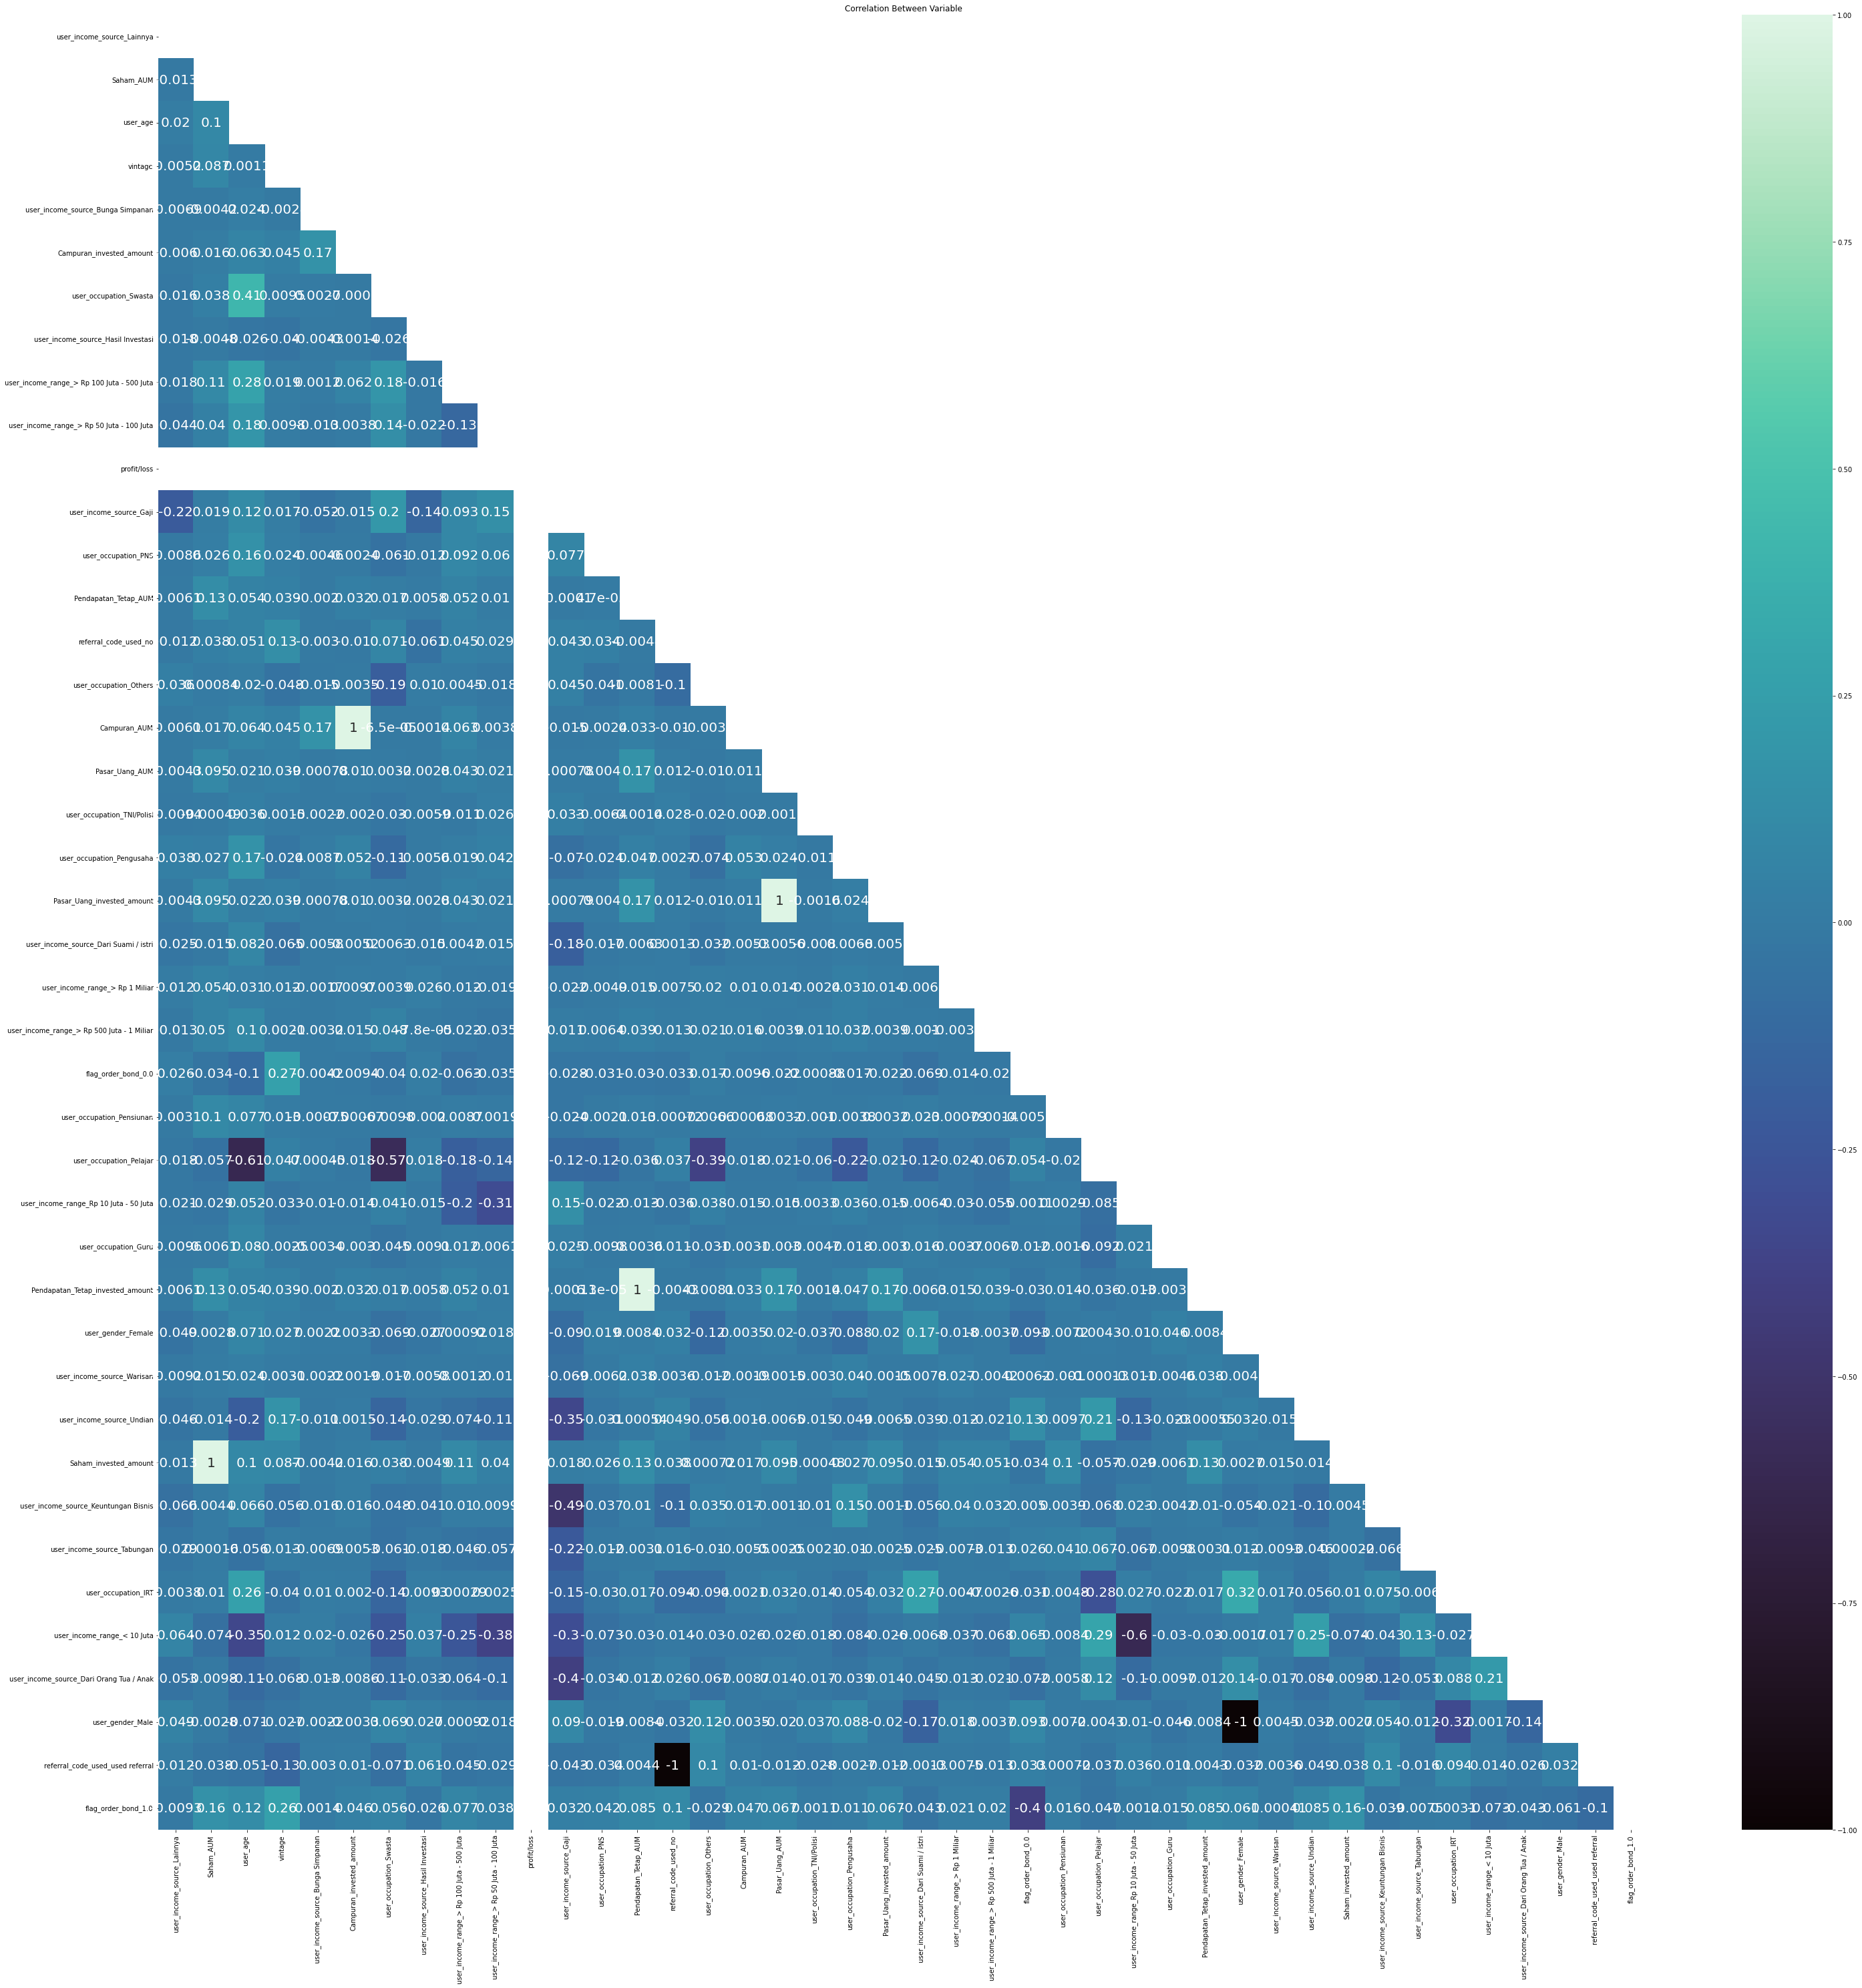

In [ ]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    sep_reg[corr_column].corr(), dtype=np.bool))

sns.heatmap(sep_reg[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = sep_reg[corr_column].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['Campuran_AUM',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Saham_invested_amount',
 'user_gender_Male',
 'referral_code_used_used referral']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Swasta',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'user_income_source_Dari Suami / istri',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'flag_order_bond_0.0',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Tabungan',
 'user_occupation_IRT',
 'user_income_range_< 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


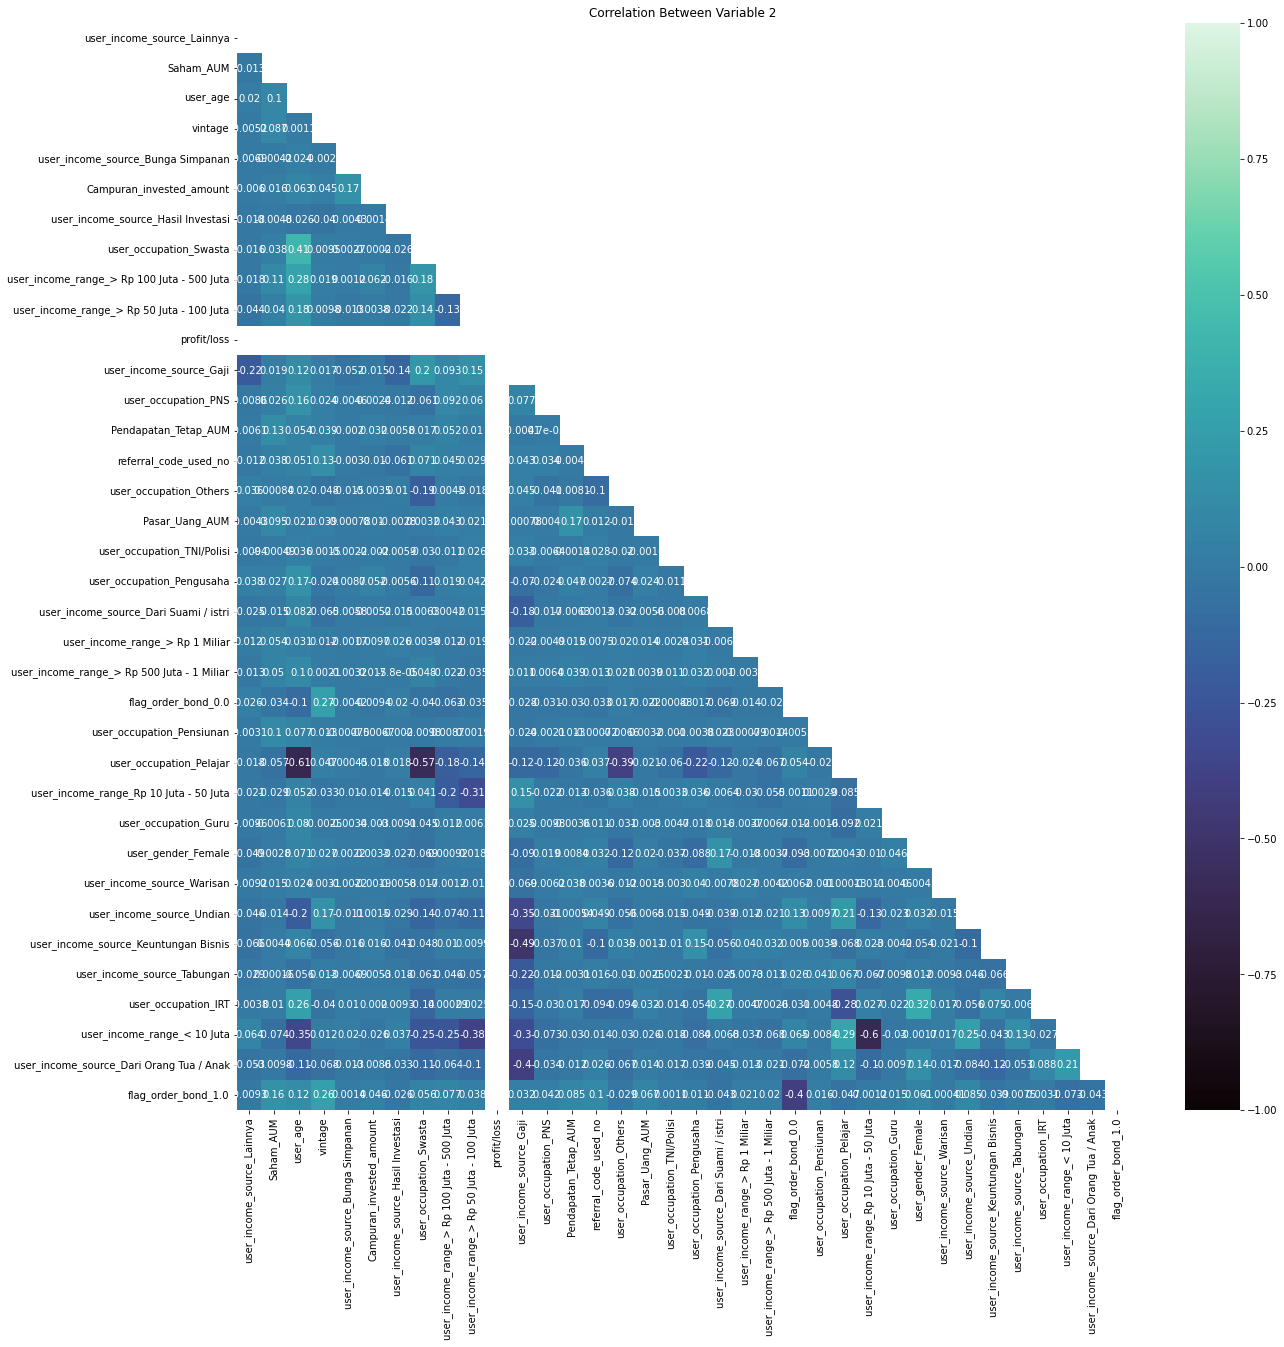

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    sep_reg[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(sep_reg[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [ ]:
# Separate dependent variables from other variables
to_keep_vars = list(set(to_keep) - set(['bond_units_ordered']))
to_keep_vars

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Swasta',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'user_income_source_Dari Suami / istri',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'flag_order_bond_0.0',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Tabungan',
 'user_occupation_IRT',
 'user_income_range_< 

In [ ]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = sep_reg[to_keep_vars]
y = sep_reg[['bond_units_ordered']]

# Split into training and test dataset to avoid overfitting
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_training, y_training)

LinearRegression()

##Regression Model Evaluation

In [ ]:
print('intercept:', model.intercept_)

intercept: [-322095.29245214]


In [ ]:
print('slope:', model.coef_)

slope: [[ 3.22092394e+05  3.98540073e-07  2.44816020e-02  1.77471575e+00
   3.22089113e+05  2.87919969e-07  3.22092302e+05  2.72763976e+00
  -2.42470301e-01 -1.95880655e-01  0.00000000e+00  3.22092219e+05
   2.72288253e+00  1.91205473e-08 -8.31513529e-02  2.56267477e+00
   6.01015971e-08  4.66005528e-01  3.46120062e+00  3.22092504e+05
   1.75407483e+00  2.64047533e-02 -7.03314216e-01 -2.01617812e+01
   3.16910668e+00 -5.12861889e-01  3.60188925e+00  4.41303639e-01
   3.22091695e+05  3.22091576e+05  3.22092045e+05  3.22091808e+05
   1.45038211e+00 -8.29266702e-01  3.22091778e+05  4.32794898e+01]]


In [ ]:
r_sq = model.score(x_training, y_training)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7559928516741145


In [ ]:
model.predict(x_test)

array([[ 0.04743617],
       [-0.74107301],
       [-0.11967757],
       ...,
       [47.00496489],
       [-0.22854013],
       [-0.22915268]])

In [ ]:
column = pd.DataFrame(zip(model.coef_))
column2 = column.explode(0)
column2.reset_index(drop=True, inplace=True)

column3 = pd.Series(x.columns)
column3 = pd.DataFrame(column3, columns=['variable'])
column3['coef'] = column2
column3.sort_values(by=['variable'], ascending=True)

,variable,coef
5,Campuran_invested_amount,0.0
16,Pasar_Uang_AUM,0.0
13,Pendapatan_Tetap_AUM,0.0
1,Saham_AUM,0.0
22,flag_order_bond_0.0,-0.703314
35,flag_order_bond_1.0,43.27949
10,profit/loss,0.0
14,referral_code_used_no,-0.083151
2,user_age,0.024482
27,user_gender_Female,0.441304


In [ ]:
model.score(x_test,y_test)

0.7550722307676141

##Apply the Model

In [ ]:
okt = users_combine.merge(balance_transformed_okt, how='left', on='user_id')

okt_reg = okt.drop(['user_id','vintage_sep','registration_import_datetime','date'],axis=1)
okt_reg = pd.get_dummies(
    okt_reg, columns=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source','flag_order_bond'],
    prefix=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source','flag_order_bond'])

okt_reg.rename(columns={'vintage_okt': 'vintage'}, inplace=True)
okt_reg['profit/loss'].replace([np.inf, -np.inf], np.nan, inplace=True)
okt_reg = okt_reg.fillna(0).astype(int)

In [ ]:
okt_reg.columns

Index(['user_age', 'vintage', 'bond_units_ordered', 'Saham_AUM',
       'Saham_invested_amount', 'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Campuran_AUM', 'Campuran_invested_amount', 'profit/loss',
       'user_gender_Female', 'user_gender_Male', 'user_occupation_Guru',
       'user_occupation_IRT', 'user_occupation_Others', 'user_occupation_PNS',
       'user_occupation_Pelajar', 'user_occupation_Pengusaha',
       'user_occupation_Pensiunan', 'user_occupation_Swasta',
       'user_occupation_TNI/Polisi', 'referral_code_used_no',
       'referral_code_used_used referral', 'user_income_range_< 10 Juta',
       'user_income_range_> Rp 1 Miliar',
       'user_income_range_> Rp 100 Juta - 500 Juta',
       'user_income_range_> Rp 50 Juta - 100 Juta',
       'user_income_range_> Rp 500 Juta - 1 Miliar',
       'user_income_range_Rp 10 Juta - 50 Juta',
       'user_income_source_Bunga Simpanan',
       'user_inc

In [ ]:
x = okt_reg[to_keep_vars]
y = okt_reg[['bond_units_ordered']]

In [ ]:
model.predict(x)

array([[ 4.33407557],
       [ 2.65738562],
       [ 0.30344167],
       ...,
       [ 1.82324363],
       [ 0.54940004],
       [-0.39822564]])

In [ ]:
model.score(x,y)

0.7336999056104392

In [ ]:
okt['bond_units_ordered'] = model.predict(x)
okt['bond_units_ordered'] = round(okt['bond_units_ordered']).astype(int)

#cleaning the result of negative bond units ordered
okt.loc[(okt['bond_units_ordered'] < 0)] = 0

okt.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_sep,vintage_okt,...,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,profit/loss
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no,Gaji,0,1,...,2021-10-29 00:00:00,2992356,3000000,1001178,1000000,1007027,1000000,0,0,0.000112
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no,Gaji,0,0,...,2021-10-29 00:00:00,3764674,3730000,941964,940000,5353606,5330000,0,0,0.006024
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no,Gaji,0,0,...,2021-10-29 00:00:00,49600,50000,10008,10000,40047,40000,0,0,-0.003450
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no,Gaji,1,2,...,2021-10-29 00:00:00,310432,290000,40372,40000,272468,270000,0,0,0.038787
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,...,2021-10-29 00:00:00,19034774,18450000,2831474,2820000,5658351,5630000,0,0,0.023219


In [ ]:
okt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           14712 non-null  int64  
 1   registration_import_datetime      14712 non-null  object 
 2   user_gender                       14712 non-null  object 
 3   user_age                          14712 non-null  int64  
 4   user_occupation                   14712 non-null  object 
 5   user_income_range                 14712 non-null  object 
 6   referral_code_used                14712 non-null  object 
 7   user_income_source                14712 non-null  object 
 8   vintage_sep                       14712 non-null  int64  
 9   vintage_okt                       14712 non-null  int64  
 10  flag_order_bond                   9497 non-null   float64
 11  bond_units_ordered                14712 non-null  int64  
 12  date

#Predicted Probability
Calculate the predicted probability per user and find the top 30% using logistic regression

##Create Logistic Regression Model

In [ ]:
sep_prob = users_combine.merge(balance_transformed_sep, how='left', on='user_id')

sep_prob = sep_prob.drop(['user_id','vintage_okt','registration_import_datetime','date'],axis=1)
sep_prob = pd.get_dummies(
    sep_prob, columns=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source'],
    prefix=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source'])
sep_prob.rename(columns={'vintage_sep': 'vintage'}, inplace=True)
sep_prob['profit/loss'].replace([np.inf, -np.inf], np.nan, inplace=True)
sep_prob = sep_prob.fillna(0).astype(int)

In [ ]:
sep_prob.columns

Index(['user_age', 'vintage', 'flag_order_bond', 'bond_units_ordered',
       'Saham_AUM', 'Saham_invested_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount', 'Campuran_AUM',
       'Campuran_invested_amount', 'profit/loss', 'user_gender_Female',
       'user_gender_Male', 'user_occupation_Guru', 'user_occupation_IRT',
       'user_occupation_Others', 'user_occupation_PNS',
       'user_occupation_Pelajar', 'user_occupation_Pengusaha',
       'user_occupation_Pensiunan', 'user_occupation_Swasta',
       'user_occupation_TNI/Polisi', 'referral_code_used_no',
       'referral_code_used_used referral', 'user_income_range_< 10 Juta',
       'user_income_range_> Rp 1 Miliar',
       'user_income_range_> Rp 100 Juta - 500 Juta',
       'user_income_range_> Rp 50 Juta - 100 Juta',
       'user_income_range_> Rp 500 Juta - 1 Miliar',
       'user_income_range_Rp 10 Juta - 50 Juta',
       'user_income_source_Bunga S

In [ ]:
corr_column = sep_prob.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['flag_order_bond']))
corr_column

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_occupation_Swasta',
 'user_income_source_Hasil Investasi',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Campuran_AUM',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'Pasar_Uang_invested_amount',
 'user_income_source_Dari Suami / istri',
 'bond_units_ordered',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'Pendapatan_Tetap_invested_amount',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'Saham_invested_amount',
 'user_in

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


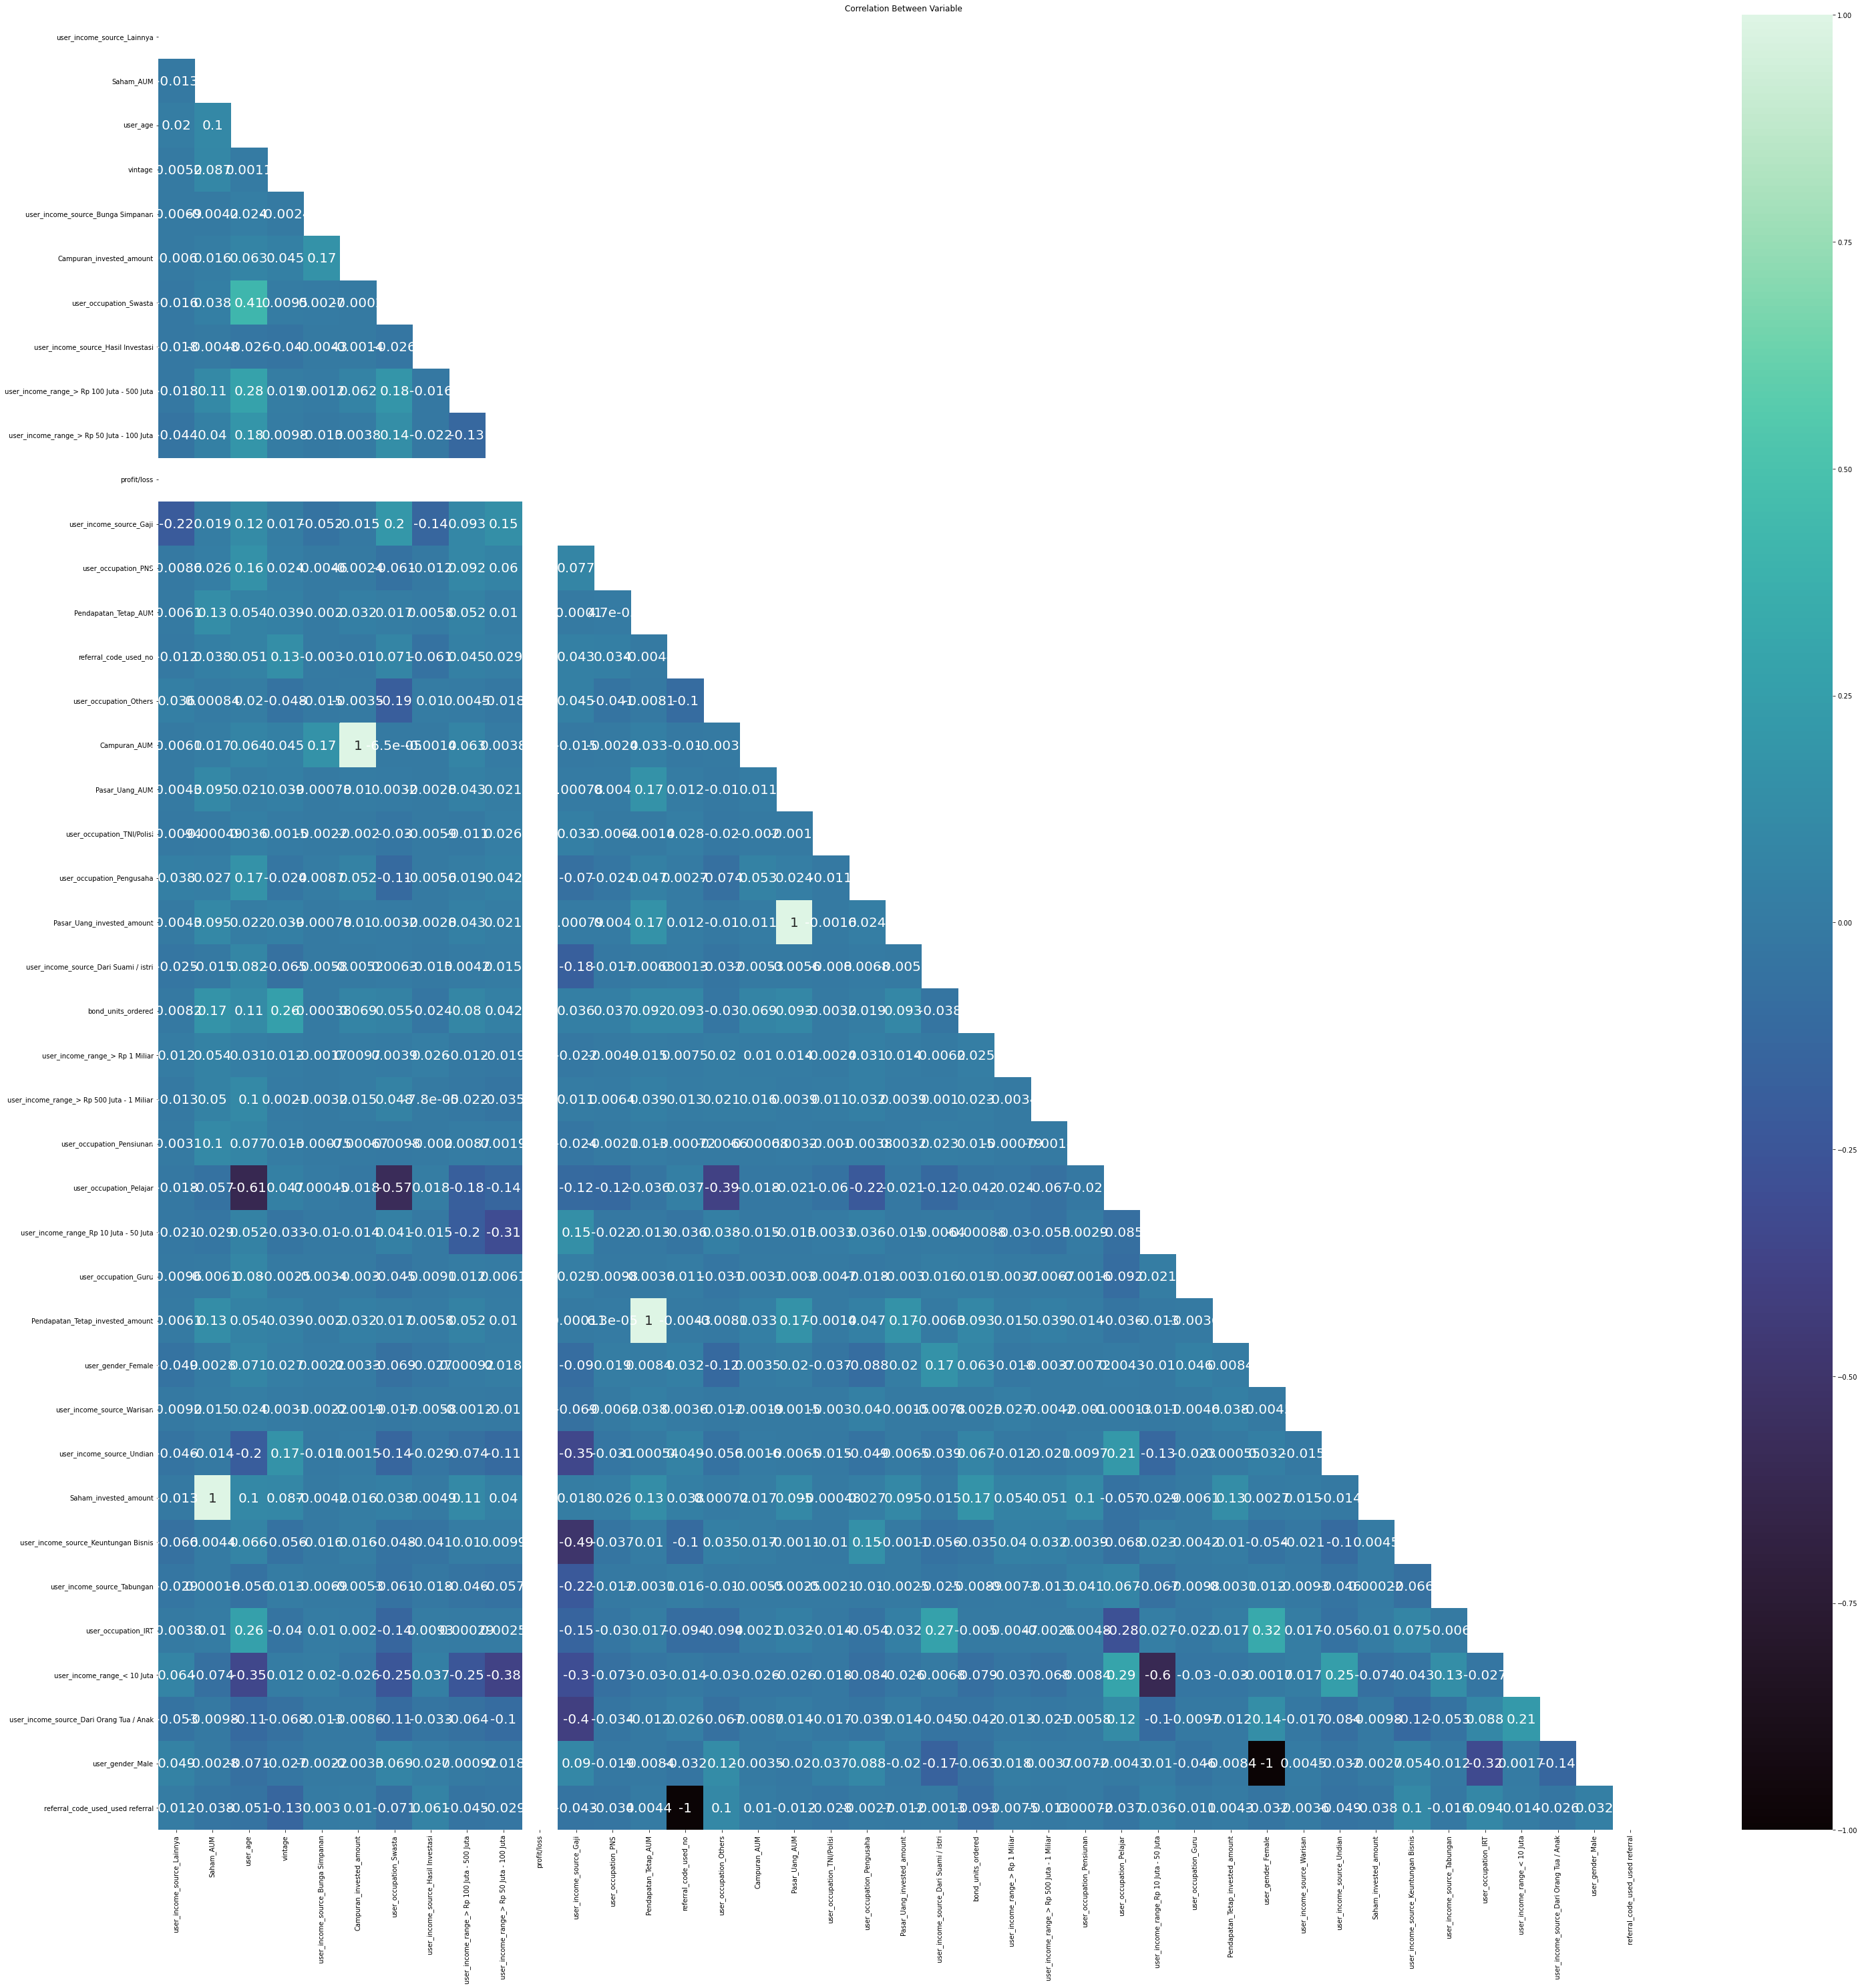

In [ ]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    sep_prob[corr_column].corr(), dtype=np.bool))

sns.heatmap(sep_prob[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = sep_prob[corr_column].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['Campuran_AUM',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Saham_invested_amount',
 'user_gender_Male',
 'referral_code_used_used referral']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Swasta',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'user_income_source_Dari Suami / istri',
 'bond_units_ordered',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Tabungan',
 'user_occupation_IRT',
 'user_income_range_< 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


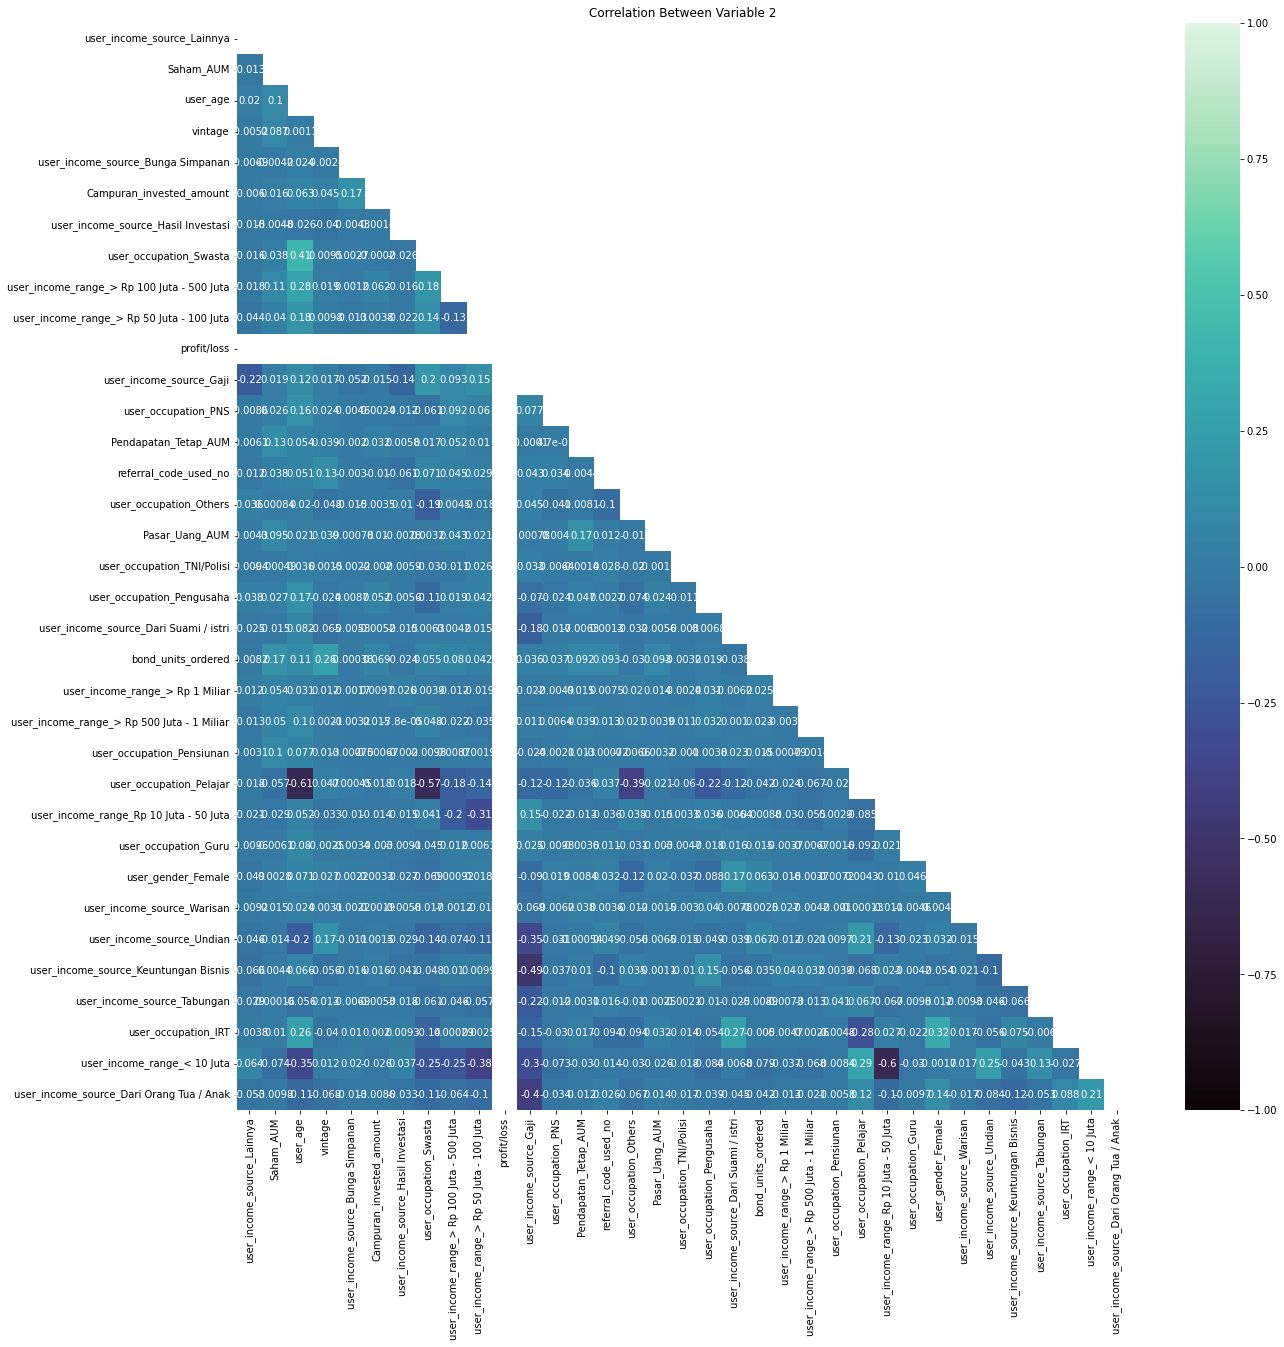

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    sep_prob[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(sep_prob[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [ ]:
# Separate dependent variables from other variables
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['user_income_source_Lainnya',
 'Saham_AUM',
 'user_age',
 'vintage',
 'user_income_source_Bunga Simpanan',
 'Campuran_invested_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Swasta',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit/loss',
 'user_income_source_Gaji',
 'user_occupation_PNS',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Others',
 'Pasar_Uang_AUM',
 'user_occupation_TNI/Polisi',
 'user_occupation_Pengusaha',
 'user_income_source_Dari Suami / istri',
 'bond_units_ordered',
 'user_income_range_> Rp 1 Miliar',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'user_occupation_Pelajar',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Guru',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_source_Undian',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Tabungan',
 'user_occupation_IRT',
 'user_income_range_< 1

In [ ]:
# Define the whole data
x = sep_prob[to_keep_vars]
y = sep_prob[['flag_order_bond']]

scaler = RobustScaler()
x = scaler.fit_transform(x)

# Split into training and test dataset to avoid overfitting
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
model=LogisticRegression(class_weight='balanced',max_iter=500,random_state=42)
model.fit(x_training, y_training)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

##Logistic Regression Evaluation

In [ ]:
model.score(x_training, y_training)

0.5528082249978757

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

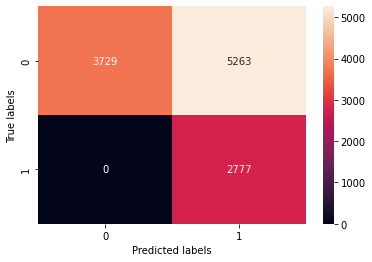

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
print(classification_report(y_training, model.predict(x_training), target_names=['Not Buy','Buy']))

              precision    recall  f1-score   support

     Not Buy       1.00      0.41      0.59      8992
         Buy       0.35      1.00      0.51      2777

    accuracy                           0.55     11769
   macro avg       0.67      0.71      0.55     11769
weighted avg       0.85      0.55      0.57     11769



In [ ]:
model.score(x_test, y_test)

0.563030920829086

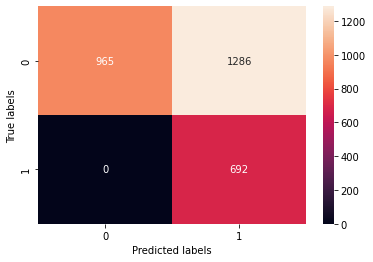

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

##Apply the Model

In [ ]:
okt_prob = users_combine.merge(balance_transformed_okt, how='left', on='user_id')

okt_prob = okt_prob.drop(['user_id','vintage_sep','registration_import_datetime','date'],axis=1)
okt_prob = pd.get_dummies(
    okt_prob, columns=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source'],
    prefix=["user_gender",'user_occupation','referral_code_used','user_income_range',
                  'user_income_source'])
okt_prob.rename(columns={'vintage_okt': 'vintage'}, inplace=True)
okt_prob['profit/loss'].replace([np.inf, -np.inf], np.nan, inplace=True)
okt_prob = okt_prob.fillna(0).astype(int)

In [ ]:
okt_prob.columns

Index(['user_age', 'vintage', 'flag_order_bond', 'bond_units_ordered',
       'Saham_AUM', 'Saham_invested_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount', 'Campuran_AUM',
       'Campuran_invested_amount', 'profit/loss', 'user_gender_Female',
       'user_gender_Male', 'user_occupation_Guru', 'user_occupation_IRT',
       'user_occupation_Others', 'user_occupation_PNS',
       'user_occupation_Pelajar', 'user_occupation_Pengusaha',
       'user_occupation_Pensiunan', 'user_occupation_Swasta',
       'user_occupation_TNI/Polisi', 'referral_code_used_no',
       'referral_code_used_used referral', 'user_income_range_< 10 Juta',
       'user_income_range_> Rp 1 Miliar',
       'user_income_range_> Rp 100 Juta - 500 Juta',
       'user_income_range_> Rp 50 Juta - 100 Juta',
       'user_income_range_> Rp 500 Juta - 1 Miliar',
       'user_income_range_Rp 10 Juta - 50 Juta',
       'user_income_source_Bunga S

In [ ]:
x = okt_prob[to_keep_vars]
y = okt_prob[['flag_order_bond']]

scaler = RobustScaler()
x = scaler.fit_transform(x)

In [ ]:
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model.score(x,y)

0.577215878194671

##Top 30% User

In [ ]:
pd.set_option('precision', 5)

In [ ]:
okt['flag_order_bond'] = model.predict(x)
user_exp = okt[['user_id','flag_order_bond','bond_units_ordered']]

predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])

user_exp['predicted_score'] = predicted_prob
user_exp['user_id'] = user_exp['user_id'].replace(0,np.nan)
user_exp['user_id'] = user_exp['user_id'].fillna(users['user_id'])
user_exp.iloc[:,:3] = user_exp.iloc[:,:3].astype(int)
user_exp.iloc[:,3:] = user_exp.iloc[:,3:].astype(float)

user_exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,user_id,flag_order_bond,bond_units_ordered,predicted_score
0,162882,1,4,0.60771
1,3485491,1,3,0.71546
2,1071649,1,0,0.50151
3,3816789,1,3,0.51173
4,3802293,1,12,0.86889
...,...,...,...,...
14707,4352347,1,1,0.50150
14708,4288026,1,2,0.58420
14709,4286882,1,2,0.53371
14710,4396739,1,1,0.50151


In [ ]:
top30percent = round(len(user_exp)*0.30)

In [ ]:
top30_percent_user = user_exp.sort_values(by=['predicted_score'], ascending=False)
top30_percent_user = top30_percent_user.iloc[:top30percent]
top30_percent_user

,user_id,flag_order_bond,bond_units_ordered,predicted_score
12284,3726685,1,62,1.00000
10642,3903589,1,63,1.00000
12607,4145418,1,50,1.00000
11156,3941913,1,58,1.00000
6520,4056373,1,86,1.00000
...,...,...,...,...
13859,4067783,1,47,0.53048
9449,4171859,1,1,0.53035
8802,4145368,1,2,0.53024
8525,3876621,1,47,0.53024


In [ ]:
top30_percent_user['predicted_score'].mean()

0.6397417310006407

##Save Dataset
Click [here](https://docs.google.com/spreadsheets/d/1G09do8z4E1G91Kg-7iEt3_TG830Uhlhz5iHx1SoAles/edit?usp=sharing) to see the list of 30% top user